In [1]:
"""
EXPLORATORY DATA ANALYSIS
Dataset: Economic Indicators

This notebook performs comprehensive exploratory analysis on economic indicators
including GDP, income, unemployment, poverty, trade, and manufacturing data.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import os

warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.1)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

print("="*80)
print(" " * 20 + "EXPLORATORY DATA ANALYSIS")
print(" " * 15 + "DATASET 1: ECONOMIC INDICATORS")
print("="*80)
print("\n✅ Libraries imported successfully")

                    EXPLORATORY DATA ANALYSIS
               DATASET 1: ECONOMIC INDICATORS

✅ Libraries imported successfully


In [11]:
print("\n" + "="*80)
print("📥 LOADING DATASET")
print("="*80)

# Load the cleaned economic indicators dataset
data_path = "../../data/cleaned/economic_indicators_cleaned.csv"

df = pd.read_csv(data_path)

print(f"\n✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   • Total Rows (Countries): {df.shape[0]}")
print(f"   • Total Columns (Features): {df.shape[1]}")
print(f"   • Unique Countries: {df['Country'].nunique()}")

# Create output directory
output_dir = "../../outputs/eda/economic_visualization"
os.makedirs(output_dir, exist_ok=True)
print(f"\n📁 Output directory created: {output_dir}")

# Display first few rows
print("\n" + "="*80)
print("👀 FIRST 5 ROWS OF THE DATASET")
print("="*80)
display(df.head())


📥 LOADING DATASET

✅ Dataset loaded successfully!

📊 Dataset Shape: (265, 66)
   • Total Rows (Countries): 265
   • Total Columns (Features): 66
   • Unique Countries: 265

📁 Output directory created: ../../outputs/eda/economic_visualization

👀 FIRST 5 ROWS OF THE DATASET


,Country,"Gross national income, Atlas method_$ billions_2024","Gross national income per capita, Atlas method_$_2024",Purchasing power parity gross national income_$ billions_2024,Purchasing power parity gross national income_per capita_$_2024,Gross domestic product_% growth_2024,Gross domestic product_per capita_% growth_2024,GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020,GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024,GDP_Growth_Agriculture_average annual real growth (%)_2010-2020,GDP_Growth_Agriculture_average annual real growth (%)_2020-2024,GDP_Growth_Industry_average annual real growth (%)_2010-2020,GDP_Growth_Industry_average annual real growth (%)_2020-2024,GDP_Growth_Manufacturing_average annual real growth (%)_2010-2020,GDP_Growth_Manufacturing_average annual real growth (%)_2020-2024,GDP_Growth_Services_average annual real growth (%)_2010-2020,GDP_Growth_Services_average annual real growth (%)_2020-2024,Structure_Value_Gross domestic product_$ billions_2015,Structure_Value_Gross domestic product_$ billions_2024,Structure_Value_Agriculture_% of GDP_2015,Structure_Value_Agriculture_% of GDP_2024,Structure_Value_Industry_% of GDP_2015,Structure_Value_Industry_% of GDP_2024,Structure_Value_Manufacturing_% of GDP_2015,Structure_Value_Manufacturing_% of GDP_2024,Structure_Value_Services_% of GDP_2015,Structure_Value_Services_% of GDP_2024,Structure_Manufacturing_Manufacturing value added_$ billions_2010,Structure_Manufacturing_Manufacturing value added_$ billions_2022,"Structure_Manufacturing_Food, beverages and tobacco_%of total_2010","Structure_Manufacturing_Food, beverages and tobacco_%of total_2022",Structure_Manufacturing_Textiles and clothing_%of total_2010,Structure_Manufacturing_Textiles and clothing_%of total_2022,Structure_Manufacturing_Machinery and transport equipment_%of total_2010,Structure_Manufacturing_Machinery and transport equipment_%of total_2022,Structure_Manufacturing_Chemicals_%of total_2010,Structure_Manufacturing_Chemicals_%of total_2022,Structure_Manufacturing_Other manufacturing_%of total_2010,Structure_Manufacturing_Other manufacturing_%of total_2022,Structure_Exports_Merchandise exports_$ millions_2015,Structure_Exports_Merchandise exports_$ millions_2023,Structure_Exports_Food_% of total_2015,Structure_Exports_Food_% of total_2023,Structure_Exports_Agricultural raw materials_% of total_2015,Structure_Exports_Agricultural raw materials_% of total_2023,Structure_Exports_Fuels_% of total_2015,Structure_Exports_Fuels_% of total_2023,Structure_Exports_Ores and metals_% of total_2015,Structure_Exports_Ores and metals_% of total_2023,Structure_Exports_Manufactures_% of total_2015,Structure_Exports_Manufactures_% of total_2023,"Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2015","Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2021","Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2015","Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2021","Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2015","Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2021","Unemployment_Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_2015","Unemployment_Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_2021",Unemployment_Unemployment with basic education (% of total labor force with basic education)_2015-21,Unemployment_Unemployment with intermediate education (% of total labor force with intermediate education)_2015-21,Unemployment_Unemployment with advanced education (% of total labor force with advanced education)_2015-21,Poverty_IntlLine1_International poverty lines_Population below $3.00 a day_%,Poverty_IntlLine1_International poverty lines_Population below $3.00 a

In [14]:
print("\n" + "="*80)
print("🔍 DATASET OVERVIEW")
print("="*80)

# Get column names grouped by category
print("\n📋 Column Categories:")

# Get all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Categorize columns
gdp_cols = [col for col in df.columns if 'GDP' in col or 'domestic product' in col]
income_cols = [col for col in df.columns if 'income' in col]
unemployment_cols = [col for col in df.columns if 'Unemployment' in col]
manufacturing_cols = [col for col in df.columns if 'Manufacturing' in col or 'manufacturing' in col]
export_cols = [col for col in df.columns if 'Export' in col or 'Merchandise' in col]
poverty_cols = [col for col in df.columns if 'Poverty' in col or 'poverty' in col]

print(f"\n   1. GDP Indicators: {len(gdp_cols)} columns")
print(f"   2. Income Indicators: {len(income_cols)} columns")
print(f"   3. Unemployment Indicators: {len(unemployment_cols)} columns")
print(f"   4. Manufacturing Indicators: {len(manufacturing_cols)} columns")
print(f"   5. Export/Trade Indicators: {len(export_cols)} columns")
print(f"   6. Poverty Indicators: {len(poverty_cols)} columns")
print(f"\n   Total Numeric Features: {len(numeric_cols)}")

# Display column names by category
print("\n📌 GDP Indicators:")
for col in gdp_cols[:10]:
    print(f"   • {col}")
if len(gdp_cols) > 10:
    print(f"   ... and {len(gdp_cols) - 10} more")

print("\n📌 Income Indicators:")
for col in income_cols[:5]:
    print(f"   • {col}")

print("\n📌 Unemployment Indicators:")
for col in unemployment_cols[:5]:
    print(f"   • {col}")
if len(unemployment_cols) > 5:
    print(f"   ... and {len(unemployment_cols) - 5} more")


🔍 DATASET OVERVIEW

📋 Column Categories:

   1. GDP Indicators: 22 columns
   2. Income Indicators: 4 columns
   3. Unemployment Indicators: 11 columns
   4. Manufacturing Indicators: 16 columns
   5. Export/Trade Indicators: 12 columns
   6. Poverty Indicators: 4 columns

   Total Numeric Features: 65

📌 GDP Indicators:
   • Gross domestic product_% growth_2024
   • Gross domestic product_per capita_% growth_2024
   • GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020
   • GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024
   • GDP_Growth_Agriculture_average annual real growth (%)_2010-2020
   • GDP_Growth_Agriculture_average annual real growth (%)_2020-2024
   • GDP_Growth_Industry_average annual real growth (%)_2010-2020
   • GDP_Growth_Industry_average annual real growth (%)_2020-2024
   • GDP_Growth_Manufacturing_average annual real growth (%)_2010-2020
   • GDP_Growth_Manufacturing_average annual real growth (%)_2020-2024
   ... an

In [15]:
print("\n" + "="*80)
print("📊 STATISTICAL SUMMARY")
print("="*80)

# Overall statistics
print("\n1️⃣ OVERALL DATASET STATISTICS:")
print("-" * 80)

total_values = df.shape[0] * df.shape[1]
missing_values = df.isnull().sum().sum()
completeness = (1 - missing_values / total_values) * 100

stats_summary = pd.DataFrame({
    'Metric': [
        'Total Countries',
        'Total Features',
        'Numeric Features',
        'Total Data Points',
        'Missing Values',
        'Data Completeness (%)'
    ],
    'Value': [
        df.shape[0],
        df.shape[1],
        len(numeric_cols),
        total_values,
        missing_values,
        f"{completeness:.2f}%"
    ]
})

display(stats_summary)

# Descriptive statistics for key indicators
print("\n2️⃣ DESCRIPTIVE STATISTICS - GDP INDICATORS:")
print("-" * 80)

if len(gdp_cols) > 0:
    gdp_stats = df[gdp_cols[:5]].describe().T
    gdp_stats['missing'] = df[gdp_cols[:5]].isnull().sum()
    display(gdp_stats)

print("\n3️⃣ DESCRIPTIVE STATISTICS - INCOME INDICATORS:")
print("-" * 80)

if len(income_cols) > 0:
    income_stats = df[income_cols].describe().T
    income_stats['missing'] = df[income_cols].isnull().sum()
    display(income_stats)

print("\n4️⃣ DESCRIPTIVE STATISTICS - UNEMPLOYMENT INDICATORS:")
print("-" * 80)

if len(unemployment_cols) > 0:
    unemp_stats = df[unemployment_cols[:5]].describe().T
    unemp_stats['missing'] = df[unemployment_cols[:5]].isnull().sum()
    display(unemp_stats)


📊 STATISTICAL SUMMARY

1️⃣ OVERALL DATASET STATISTICS:
--------------------------------------------------------------------------------


,Metric,Value
0,Total Countries,265
1,Total Features,66
2,Numeric Features,65
3,Total Data Points,17490
4,Missing Values,0
5,Data Completeness (%),100.00%



2️⃣ DESCRIPTIVE STATISTICS - GDP INDICATORS:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,missing
Gross domestic product_% growth_2024,265.0,3.161744,3.999071,-26.557526,2.029484,3.235649,4.200000,43.372009,0
Gross domestic product_per capita_% growth_2024,265.0,2.080318,4.221382,-28.270677,0.827703,2.105942,3.272362,42.555340,0
GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020,265.0,2.617925,2.419560,-11.700000,1.500000,2.750000,3.800000,9.300000,0
GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024,265.0,3.998868,3.865215,-13.100000,2.900000,3.800000,5.200000,40.900000,0
GDP_Growth_Agriculture_average annual real growth (%)_2010-2020,265.0,2.140189,2.764353,-15.200000,1.300000,2.250000,3.000000,17.100000,0



3️⃣ DESCRIPTIVE STATISTICS - INCOME INDICATORS:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,missing
"Gross national income, Atlas method_$ billions_2024",265.0,1652.078562,8983.736464,0.086041,16.5797,45.09605,219.241,109382.598282,0
"Gross national income per capita, Atlas method_$_2024",265.0,16707.983269,21842.802638,190.000000,3740.0000,7990.00000,20690.000,140280.000000,0
Purchasing power parity gross national income_$ billions_2024,265.0,2968.488710,15293.623847,0.081645,49.6212,115.35600,436.190,196083.729275,0
Purchasing power parity gross national income_per capita_$_2024,265.0,27749.932907,25403.408323,950.000000,10570.0000,20220.00000,35130.000,126190.000000,0



4️⃣ DESCRIPTIVE STATISTICS - UNEMPLOYMENT INDICATORS:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,missing
"Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2015",265.0,7.149826,4.783755,0.062,4.347000,5.951844,8.590077,27.105,0
"Unemployment_Unemployment, male (% of male labor force) (modeled ILO estimate)_2021",265.0,7.141684,4.746474,0.078,4.408000,6.114743,8.138000,32.882,0
"Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2015",265.0,8.778749,6.656588,0.451,4.752225,6.569000,10.765000,36.115,0
"Unemployment_Unemployment, female (% of female labor force) (modeled ILO estimate)_2021",265.0,8.749076,6.777738,0.416,5.047000,6.420441,10.309000,42.508,0
"Unemployment_Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_2015",265.0,16.436911,11.015734,0.227,9.698000,13.969000,20.565000,71.634,0



📊 DISTRIBUTION ANALYSIS - GDP INDICATORS

📈 Creating distribution plots for 8 GDP indicators...
   ✅ Saved: distributions_gdp_indicators.png


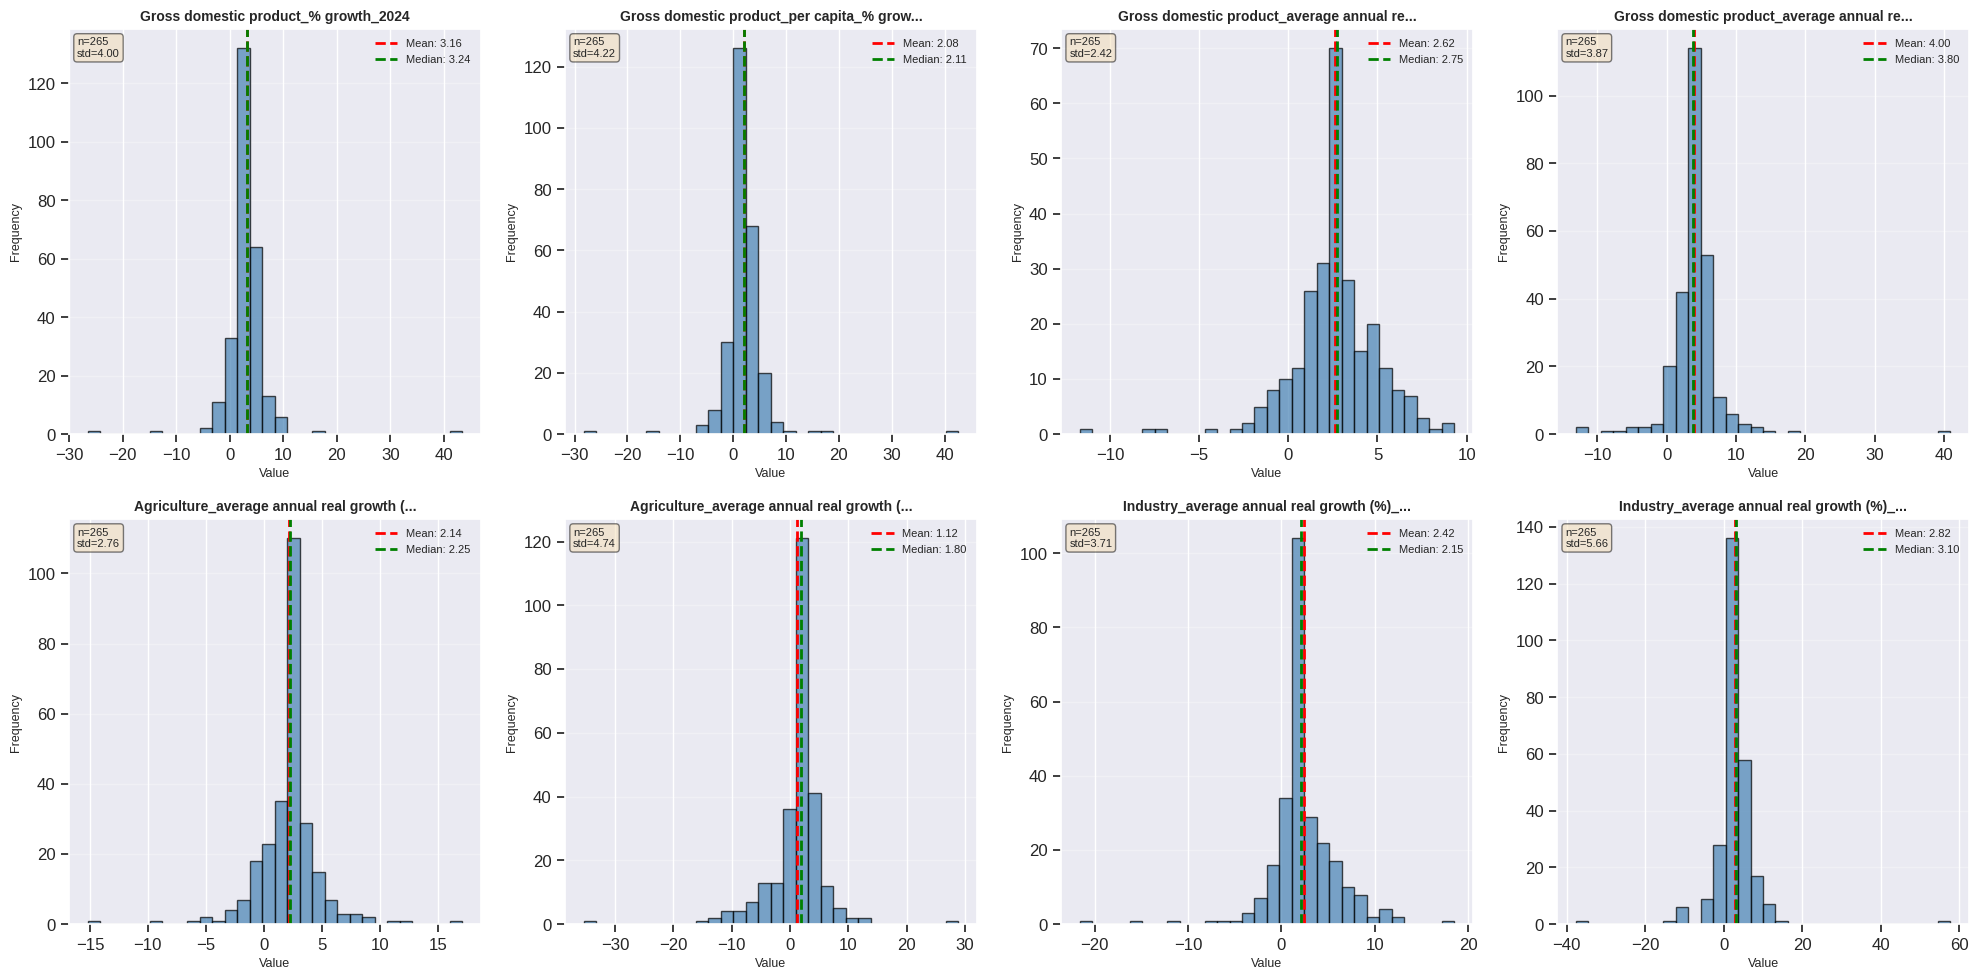

In [16]:
print("\n" + "="*80)
print("📊 DISTRIBUTION ANALYSIS - GDP INDICATORS")
print("="*80)

if len(gdp_cols) > 0:
    # Select key GDP columns
    key_gdp_cols = gdp_cols[:8]
    
    print(f"\n📈 Creating distribution plots for {len(key_gdp_cols)} GDP indicators...")
    
    # Create subplots
    n_cols = 4
    n_rows = 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(key_gdp_cols):
        ax = axes[idx]
        
        # Get data and remove NaN
        data = df[col].dropna()
        
        if len(data) > 0:
            # Plot histogram
            ax.hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
            
            # Calculate statistics
            mean_val = data.mean()
            median_val = data.median()
            std_val = data.std()
            
            # Add mean and median lines
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle='--', linewidth=2, 
                      label=f'Median: {median_val:.2f}')
            
            # Formatting
            title = col.replace('GDP_Growth_', '').replace('Structure_Value_', '')
            ax.set_title(title[:40] + ('...' if len(title) > 40 else ''), 
                        fontsize=10, fontweight='bold')
            ax.set_xlabel('Value', fontsize=9)
            ax.set_ylabel('Frequency', fontsize=9)
            ax.legend(fontsize=8, loc='upper right')
            ax.grid(axis='y', alpha=0.3)
            
            # Add text box with statistics
            textstr = f'n={len(data)}\nstd={std_val:.2f}'
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=8,
                   verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/distributions_gdp_indicators.png', 
                dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: distributions_gdp_indicators.png")
    plt.show()
else:
    print("   ⚠️ No GDP columns found")


📊 DISTRIBUTION ANALYSIS - INCOME INDICATORS

💰 Creating distribution plots for 4 income indicators...
   ✅ Saved: distributions_income_indicators.png


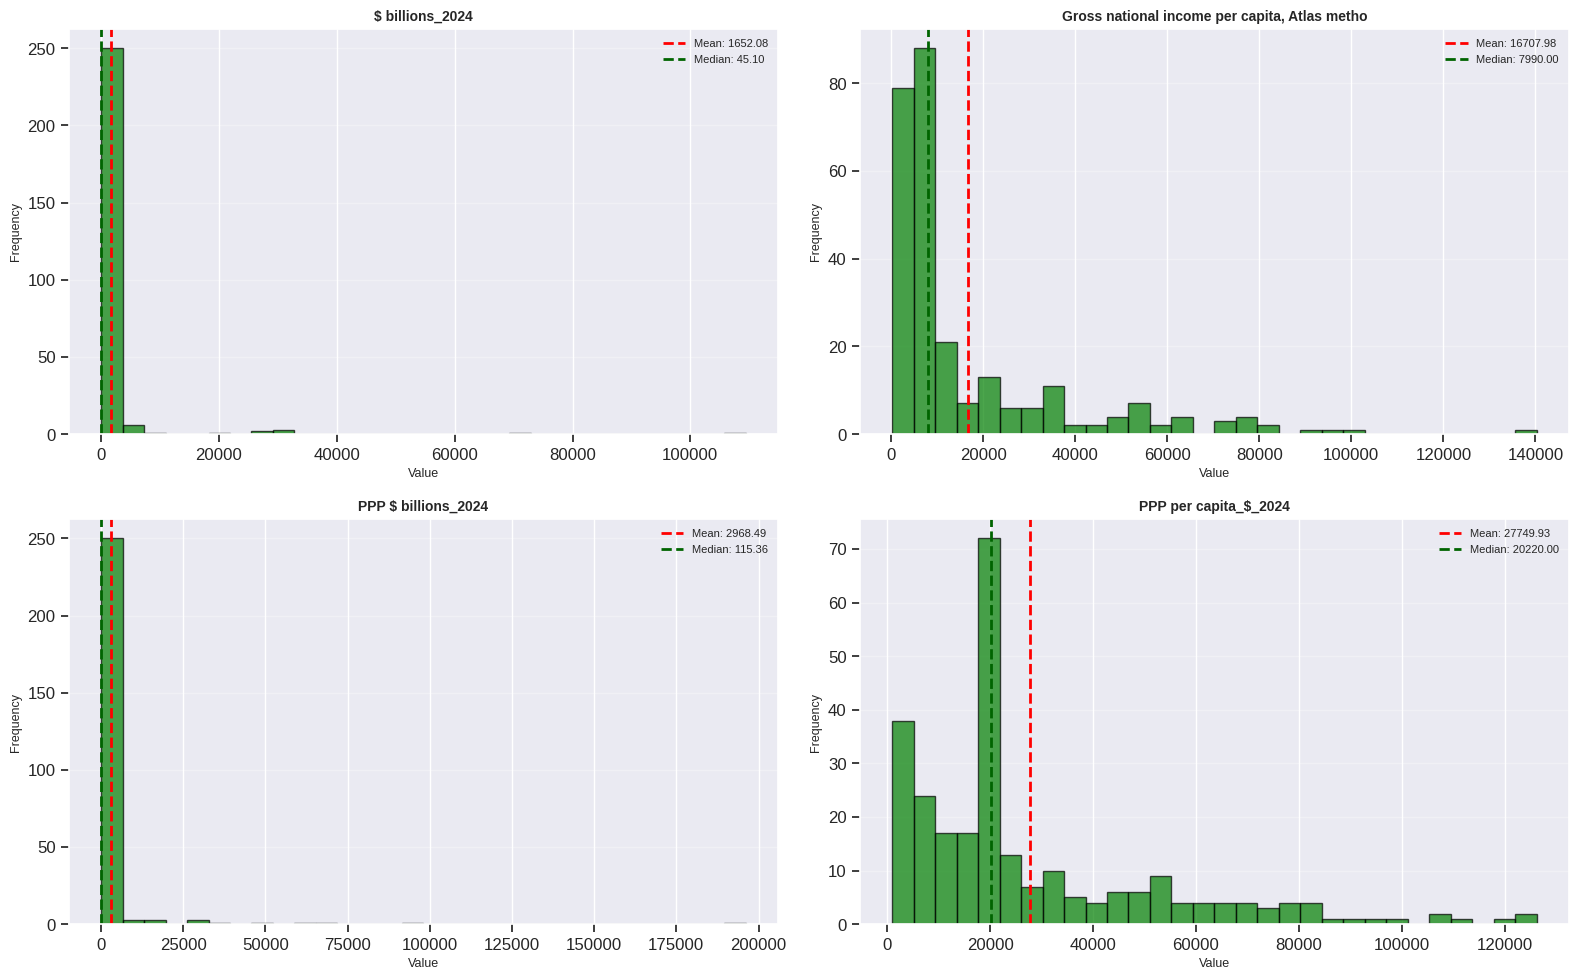

In [17]:
print("\n" + "="*80)
print("📊 DISTRIBUTION ANALYSIS - INCOME INDICATORS")
print("="*80)

if len(income_cols) > 0:
    print(f"\n💰 Creating distribution plots for {len(income_cols)} income indicators...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(income_cols[:4]):
        ax = axes[idx]
        
        data = df[col].dropna()
        
        if len(data) > 0:
            ax.hist(data, bins=30, color='green', edgecolor='black', alpha=0.7)
            
            mean_val = data.mean()
            median_val = data.median()
            
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='darkgreen', linestyle='--', linewidth=2, 
                      label=f'Median: {median_val:.2f}')
            
            title = col.replace('Gross national income, Atlas method_', '').replace('Purchasing power parity gross national income_', 'PPP ')
            ax.set_title(title[:45], fontsize=10, fontweight='bold')
            ax.set_xlabel('Value', fontsize=9)
            ax.set_ylabel('Frequency', fontsize=9)
            ax.legend(fontsize=8)
            ax.grid(axis='y', alpha=0.3)
    
    # Hide empty subplots if less than 4 income columns
    for idx in range(len(income_cols[:4]), 4):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/distributions_income_indicators.png', 
                dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: distributions_income_indicators.png")
    plt.show()
else:
    print("   ⚠️ No income columns found")


📊 DISTRIBUTION ANALYSIS - UNEMPLOYMENT INDICATORS

👥 Creating distribution plots for unemployment indicators...
   ✅ Saved: distributions_unemployment_indicators.png


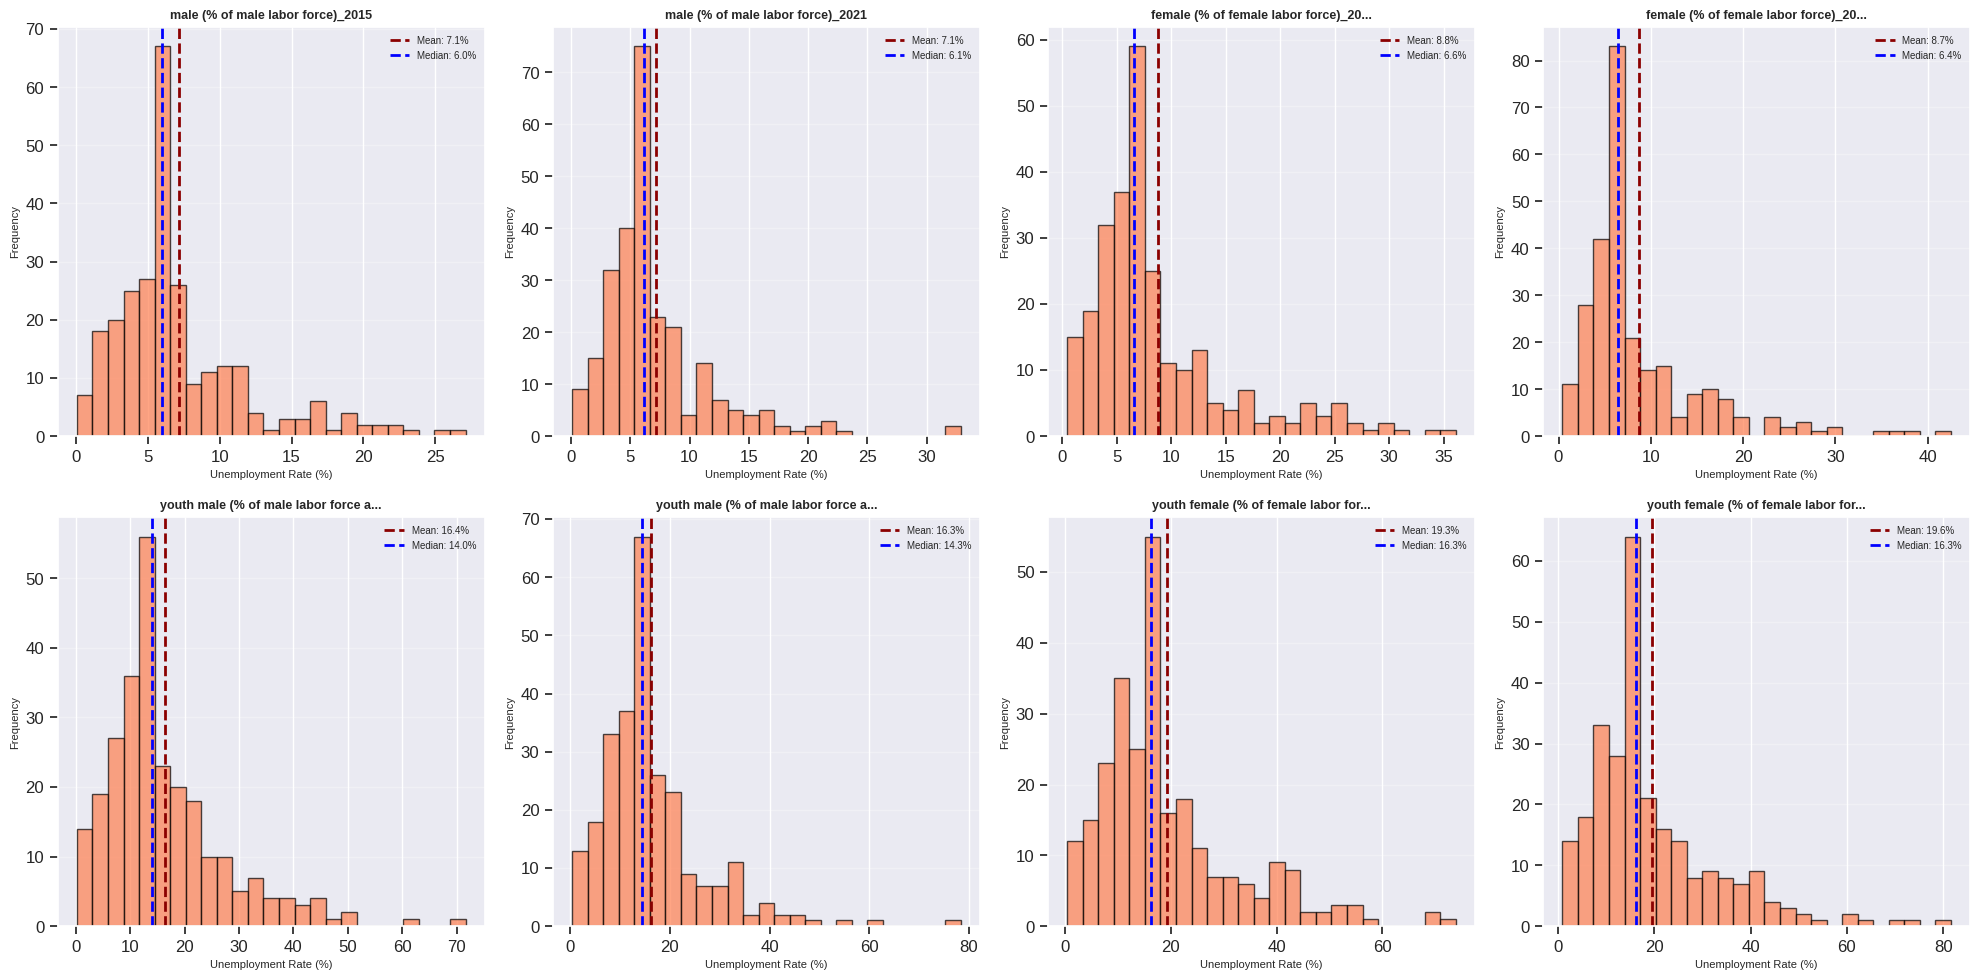

In [18]:
print("\n" + "="*80)
print("📊 DISTRIBUTION ANALYSIS - UNEMPLOYMENT INDICATORS")
print("="*80)

if len(unemployment_cols) > 0:
    print(f"\n👥 Creating distribution plots for unemployment indicators...")
    
    # Select key unemployment columns
    key_unemp_cols = unemployment_cols[:8]
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(key_unemp_cols):
        ax = axes[idx]
        
        data = df[col].dropna()
        
        if len(data) > 0:
            ax.hist(data, bins=25, color='coral', edgecolor='black', alpha=0.7)
            
            mean_val = data.mean()
            median_val = data.median()
            
            ax.axvline(mean_val, color='darkred', linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.1f}%')
            ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, 
                      label=f'Median: {median_val:.1f}%')
            
            title = col.replace('Unemployment_Unemployment, ', '').replace(' (modeled ILO estimate)', '')
            ax.set_title(title[:35] + ('...' if len(title) > 35 else ''), 
                        fontsize=9, fontweight='bold')
            ax.set_xlabel('Unemployment Rate (%)', fontsize=8)
            ax.set_ylabel('Frequency', fontsize=8)
            ax.legend(fontsize=7)
            ax.grid(axis='y', alpha=0.3)
    
    for idx in range(len(key_unemp_cols), 8):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/distributions_unemployment_indicators.png', 
                dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: distributions_unemployment_indicators.png")
    plt.show()
else:
    print("   ⚠️ No unemployment columns found")


🔥 CORRELATION ANALYSIS - ECONOMIC INDICATORS

📊 Creating comprehensive correlation heatmap...
   Analyzing correlations between 13 key indicators...
   ✅ Saved: correlation_heatmap_comprehensive.png


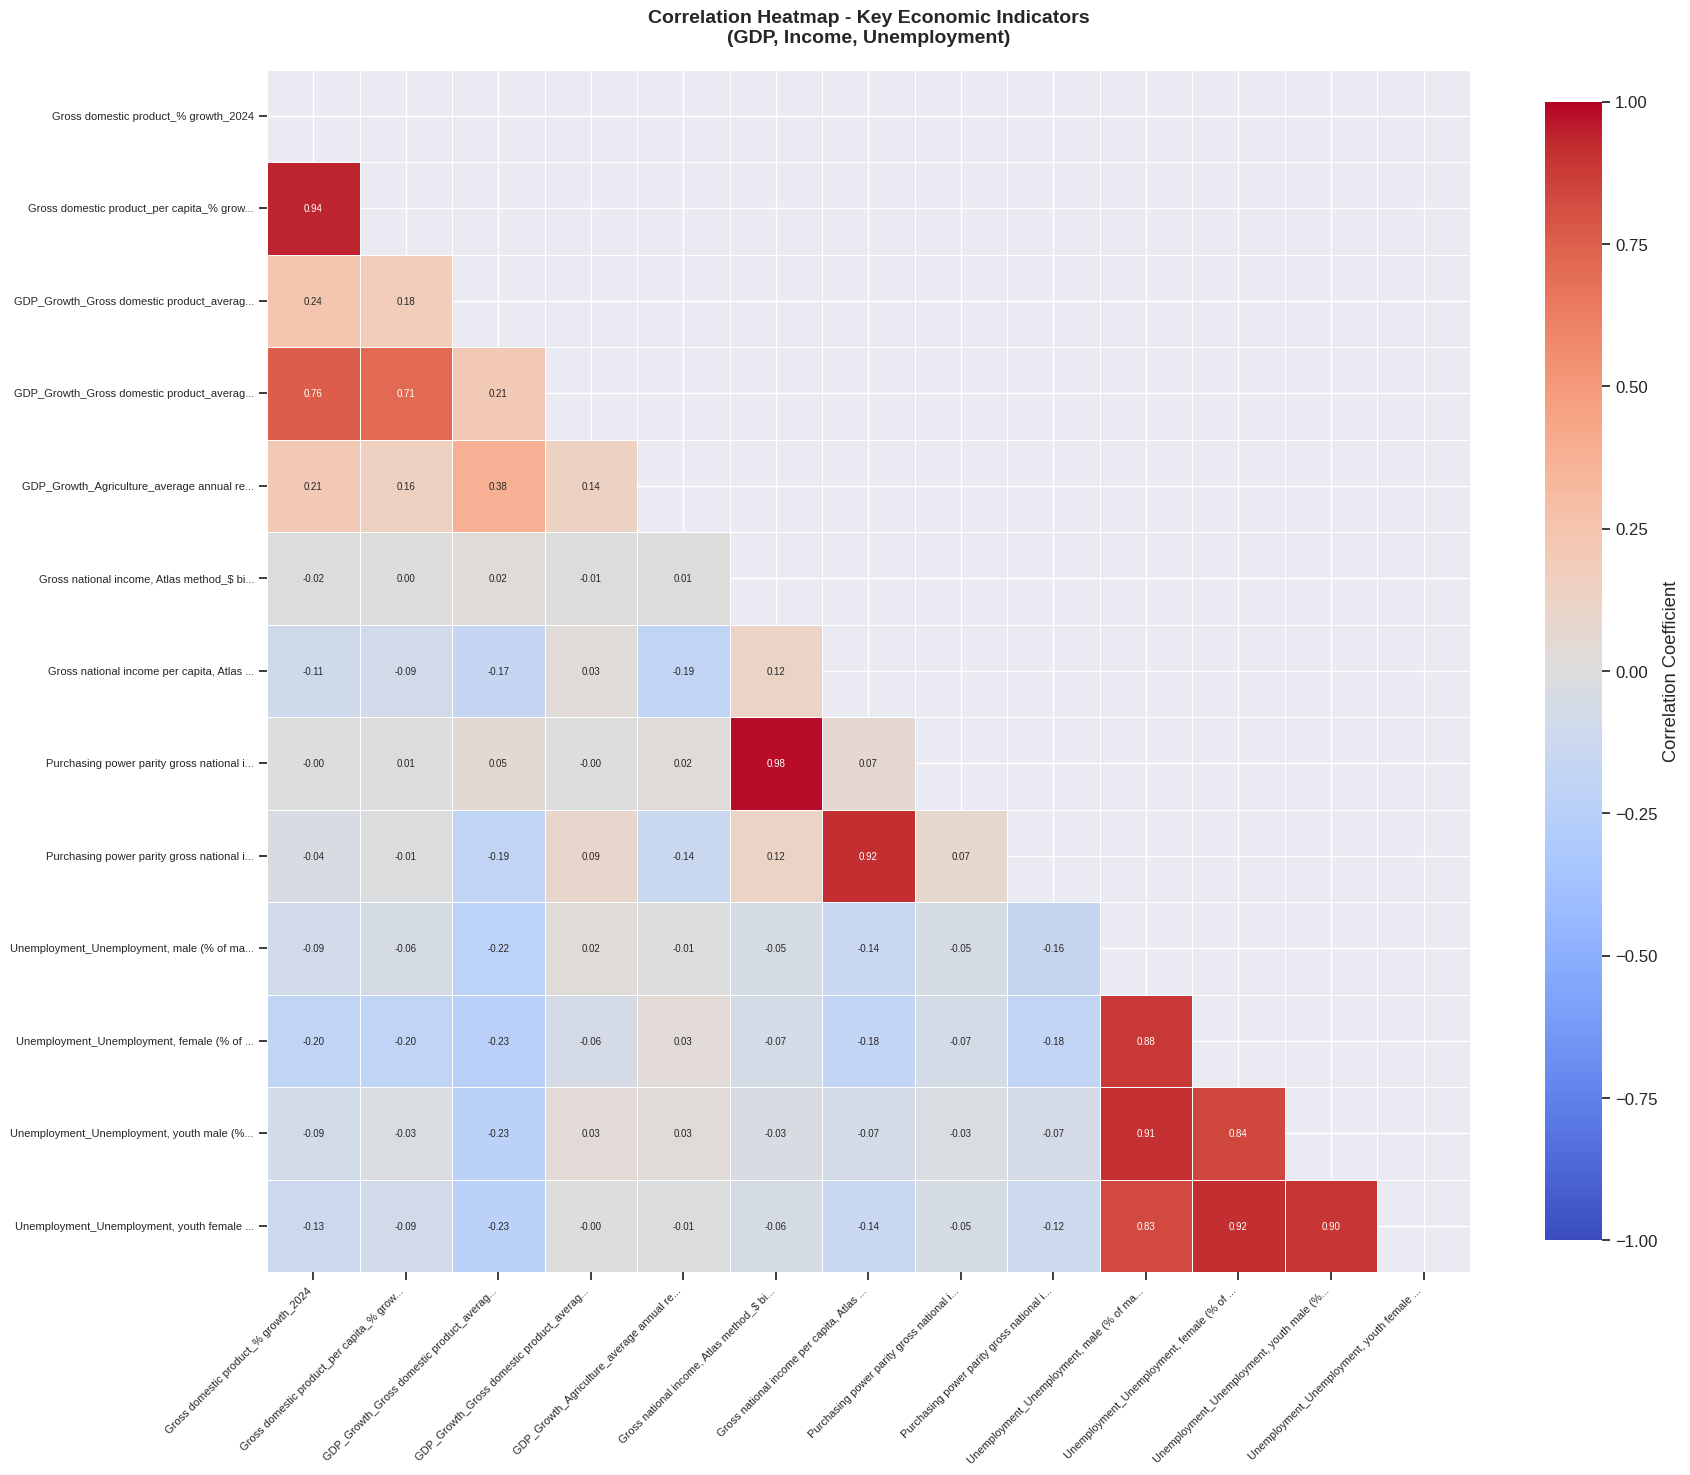


📊 STRONGEST CORRELATIONS:
--------------------------------------------------------------------------------

   Found 11 strong correlations (|r| > 0.7):


,Feature 1,Feature 2,Correlation
3,"Gross national income, Atlas method_$ billions...",Purchasing power parity gross national income_...,0.980104
0,Gross domestic product_% growth_2024,Gross domestic product_per capita_% growth_2024,0.939567
4,"Gross national income per capita, Atlas method...",Purchasing power parity gross national income_...,0.916938
9,"Unemployment_Unemployment, female (% of female...","Unemployment_Unemployment, youth female (% of ...",0.915922
6,"Unemployment_Unemployment, male (% of male lab...","Unemployment_Unemployment, youth male (% of ma...",0.910593
10,"Unemployment_Unemployment, youth male (% of ma...","Unemployment_Unemployment, youth female (% of ...",0.895421
5,"Unemployment_Unemployment, male (% of male lab...","Unemployment_Unemployment, female (% of female...",0.884119
8,"Unemployment_Unemployment, female (% of female...","Unemployment_Unemployment, youth male (% of ma...",0.843336
7,"Unemployment_Unemployment, male (% of male lab...","Unemployment_Unemployment, youth female (% of ...",0.831134
1,Gross domestic product_% growth_2024,GDP_Growth_Gross domestic product_average annu...,0.760891


In [19]:
print("\n" + "="*80)
print("🔥 CORRELATION ANALYSIS - ECONOMIC INDICATORS")
print("="*80)

print("\n📊 Creating comprehensive correlation heatmap...")

# Select important economic indicators for correlation
important_indicators = []

# Add GDP indicators
important_indicators.extend([col for col in gdp_cols if '2024' in col or 'growth' in col][:5])

# Add income indicators
important_indicators.extend(income_cols[:4])

# Add unemployment (recent years)
important_indicators.extend([col for col in unemployment_cols if '2021' in col][:4])

# Remove duplicates
important_indicators = list(dict.fromkeys(important_indicators))

print(f"   Analyzing correlations between {len(important_indicators)} key indicators...")

if len(important_indicators) >= 2:
    # Calculate correlation matrix
    corr_matrix = df[important_indicators].corr()
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(18, 16))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Draw heatmap
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
                annot_kws={'size': 7},
                vmin=-1, vmax=1,
                ax=ax)
    
    ax.set_title('Correlation Heatmap - Key Economic Indicators\n(GDP, Income, Unemployment)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Shorten labels for readability
    labels = [label.get_text()[:40] + ('...' if len(label.get_text()) > 40 else '') 
              for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    ax.set_yticklabels(labels, rotation=0, fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/correlation_heatmap_comprehensive.png', 
                dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: correlation_heatmap_comprehensive.png")
    plt.show()
    
    # Find and display strong correlations
    print("\n📊 STRONGEST CORRELATIONS:")
    print("-" * 80)
    
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # Strong correlation threshold
                strong_correlations.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if strong_correlations:
        strong_corr_df = pd.DataFrame(strong_correlations).sort_values(
            'Correlation', ascending=False, key=abs
        )
        print(f"\n   Found {len(strong_corr_df)} strong correlations (|r| > 0.7):")
        display(strong_corr_df)
    else:
        print("   No strong correlations (|r| > 0.7) found")
else:
    print("   ⚠️ Not enough indicators for correlation analysis")


📈 SCATTER PLOT ANALYSIS - GDP vs INCOME

💹 Creating scatter plots...
   ✅ Saved: scatter_gdp_vs_income.png


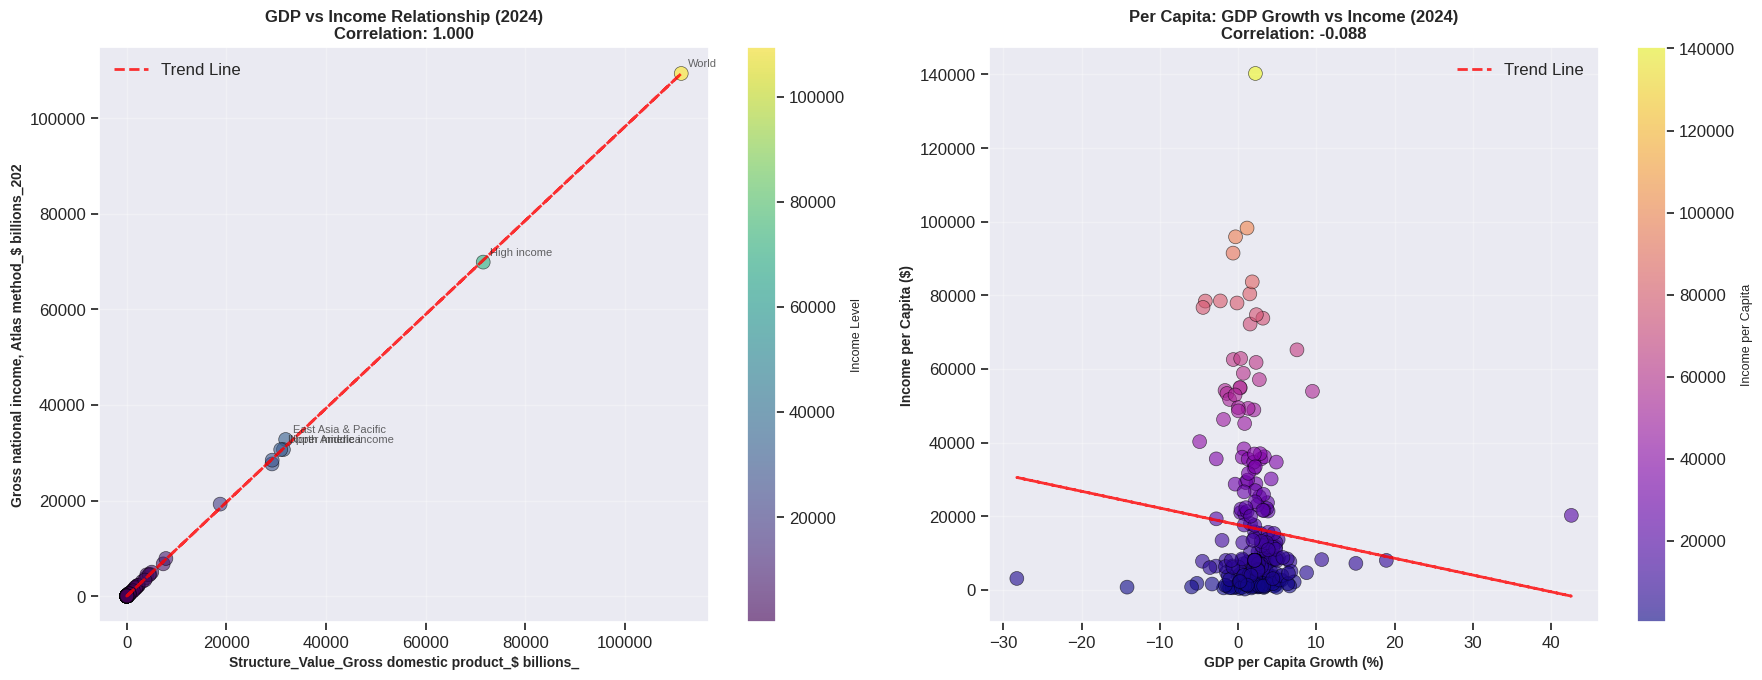

In [20]:
print("\n" + "="*80)
print("📈 SCATTER PLOT ANALYSIS - GDP vs INCOME")
print("="*80)

# Find GDP 2024 and Income 2024 columns
gdp_2024 = [col for col in gdp_cols if '2024' in col and 'billions' in col]
income_2024 = [col for col in income_cols if '2024' in col]

if gdp_2024 and income_2024:
    print(f"\n💹 Creating scatter plots...")
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Plot 1: GDP vs GNI
    ax1 = axes[0]
    x_col = gdp_2024[0]
    y_col = income_2024[0] if income_2024[0] != x_col else income_2024[1] if len(income_2024) > 1 else income_2024[0]
    
    # Remove NaN values
    plot_data = df[[x_col, y_col, 'Country']].dropna()
    
    if len(plot_data) > 0:
        scatter = ax1.scatter(plot_data[x_col], plot_data[y_col], 
                             c=plot_data[y_col], cmap='viridis',
                             s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
        
        # Add trend line
        z = np.polyfit(plot_data[x_col], plot_data[y_col], 1)
        p = np.poly1d(z)
        ax1.plot(plot_data[x_col], p(plot_data[x_col]), 
                "r--", alpha=0.8, linewidth=2, label='Trend Line')
        
        # Calculate correlation
        correlation = plot_data[x_col].corr(plot_data[y_col])
        
        ax1.set_xlabel(x_col[:50], fontsize=10, fontweight='bold')
        ax1.set_ylabel(y_col[:50], fontsize=10, fontweight='bold')
        ax1.set_title(f'GDP vs Income Relationship (2024)\nCorrelation: {correlation:.3f}', 
                     fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax1)
        cbar.set_label('Income Level', fontsize=9)
        
        # Annotate top 5 countries
        top_5 = plot_data.nlargest(5, x_col)
        for idx, row in top_5.iterrows():
            ax1.annotate(row['Country'], 
                        (row[x_col], row[y_col]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)
    
    # Plot 2: Per Capita Analysis
    ax2 = axes[1]
    
    # Find per capita columns
    gdp_per_capita = [col for col in gdp_cols if 'per capita' in col and '2024' in col]
    income_per_capita = [col for col in income_cols if 'per capita' in col and '2024' in col]
    
    if gdp_per_capita and income_per_capita:
        x_col2 = gdp_per_capita[0]
        y_col2 = income_per_capita[0]
        
        plot_data2 = df[[x_col2, y_col2, 'Country']].dropna()
        
        if len(plot_data2) > 0:
            scatter2 = ax2.scatter(plot_data2[x_col2], plot_data2[y_col2], 
                                  c=plot_data2[y_col2], cmap='plasma',
                                  s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
            
            # Trend line
            z2 = np.polyfit(plot_data2[x_col2], plot_data2[y_col2], 1)
            p2 = np.poly1d(z2)
            ax2.plot(plot_data2[x_col2], p2(plot_data2[x_col2]), 
                    "r--", alpha=0.8, linewidth=2, label='Trend Line')
            
            correlation2 = plot_data2[x_col2].corr(plot_data2[y_col2])
            
            ax2.set_xlabel('GDP per Capita Growth (%)', fontsize=10, fontweight='bold')
            ax2.set_ylabel('Income per Capita ($)', fontsize=10, fontweight='bold')
            ax2.set_title(f'Per Capita: GDP Growth vs Income (2024)\nCorrelation: {correlation2:.3f}', 
                         fontsize=12, fontweight='bold')
            ax2.grid(True, alpha=0.3)
            ax2.legend()
            
            cbar2 = plt.colorbar(scatter2, ax=ax2)
            cbar2.set_label('Income per Capita', fontsize=9)
    else:
        ax2.text(0.5, 0.5, 'Per Capita Data Not Available', 
                ha='center', va='center', fontsize=14, transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/scatter_gdp_vs_income.png', 
                dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: scatter_gdp_vs_income.png")
    plt.show()
else:
    print("   ⚠️ Required columns not found for scatter plot")


📦 BOX PLOT ANALYSIS - KEY INDICATORS

📊 Creating box plots for key economic indicators...
   ✅ Saved: boxplots_key_indicators.png


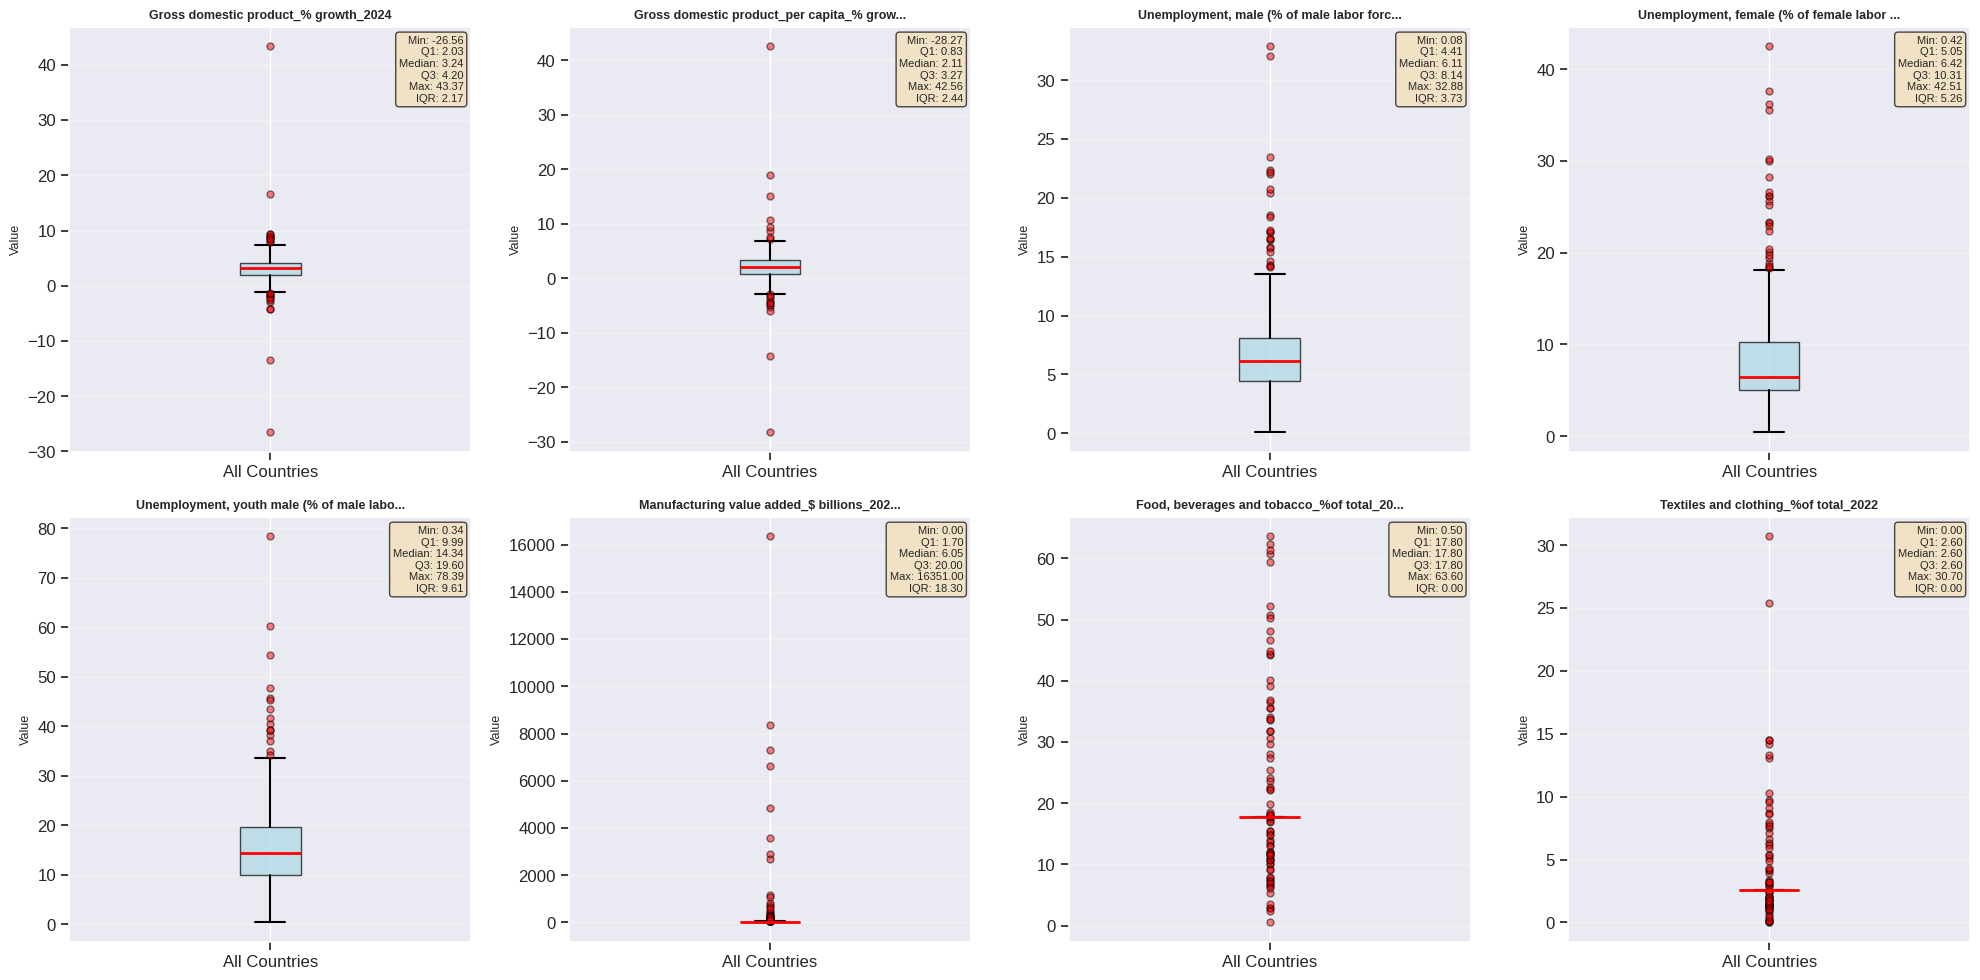

In [21]:
print("\n" + "="*80)
print("📦 BOX PLOT ANALYSIS - KEY INDICATORS")
print("="*80)

print(f"\n📊 Creating box plots for key economic indicators...")

# Select key indicators for box plot
box_indicators = []

# Add recent GDP growth
box_indicators.extend([col for col in gdp_cols if 'growth' in col and '2024' in col][:2])

# Add unemployment rates
box_indicators.extend([col for col in unemployment_cols if '2021' in col][:3])

# Add manufacturing indicators
box_indicators.extend([col for col in manufacturing_cols if '2022' in col][:3])

# Remove duplicates
box_indicators = list(dict.fromkeys(box_indicators))[:8]

if len(box_indicators) > 0:
    n_cols = 4
    n_rows = 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(box_indicators):
        ax = axes[idx]
        
        data = df[col].dropna()
        
        if len(data) > 0:
            # Create box plot
            bp = ax.boxplot([data], 
                           labels=['All Countries'],
                           patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(linewidth=1.5),
                           capprops=dict(linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='red', 
                                         markersize=5, alpha=0.5))
            
            # Calculate statistics
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            iqr = q3 - q1
            
            # Add statistics text
            stats_text = (f"Min: {data.min():.2f}\n"
                         f"Q1: {q1:.2f}\n"
                         f"Median: {data.median():.2f}\n"
                         f"Q3: {q3:.2f}\n"
                         f"Max: {data.max():.2f}\n"
                         f"IQR: {iqr:.2f}")
            
            ax.text(0.98, 0.98, stats_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                   fontsize=8)
            
            # Title
            title = col.replace('GDP_Growth_', '').replace('Structure_Manufacturing_', '').replace('Unemployment_', '')
            ax.set_title(title[:40] + ('...' if len(title) > 40 else ''), 
                        fontsize=9, fontweight='bold')
            ax.set_ylabel('Value', fontsize=9)
            ax.grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(box_indicators), n_rows * n_cols):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/boxplots_key_indicators.png', 
                dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: boxplots_key_indicators.png")
    plt.show()
else:
    print("   ⚠️ No indicators found for box plots")


🏆 TOP & BOTTOM COUNTRIES - GDP ANALYSIS

📊 Analyzing: Structure_Value_Gross domestic product_$ billions_2024
   ✅ Saved: top_bottom_countries_gdp.png


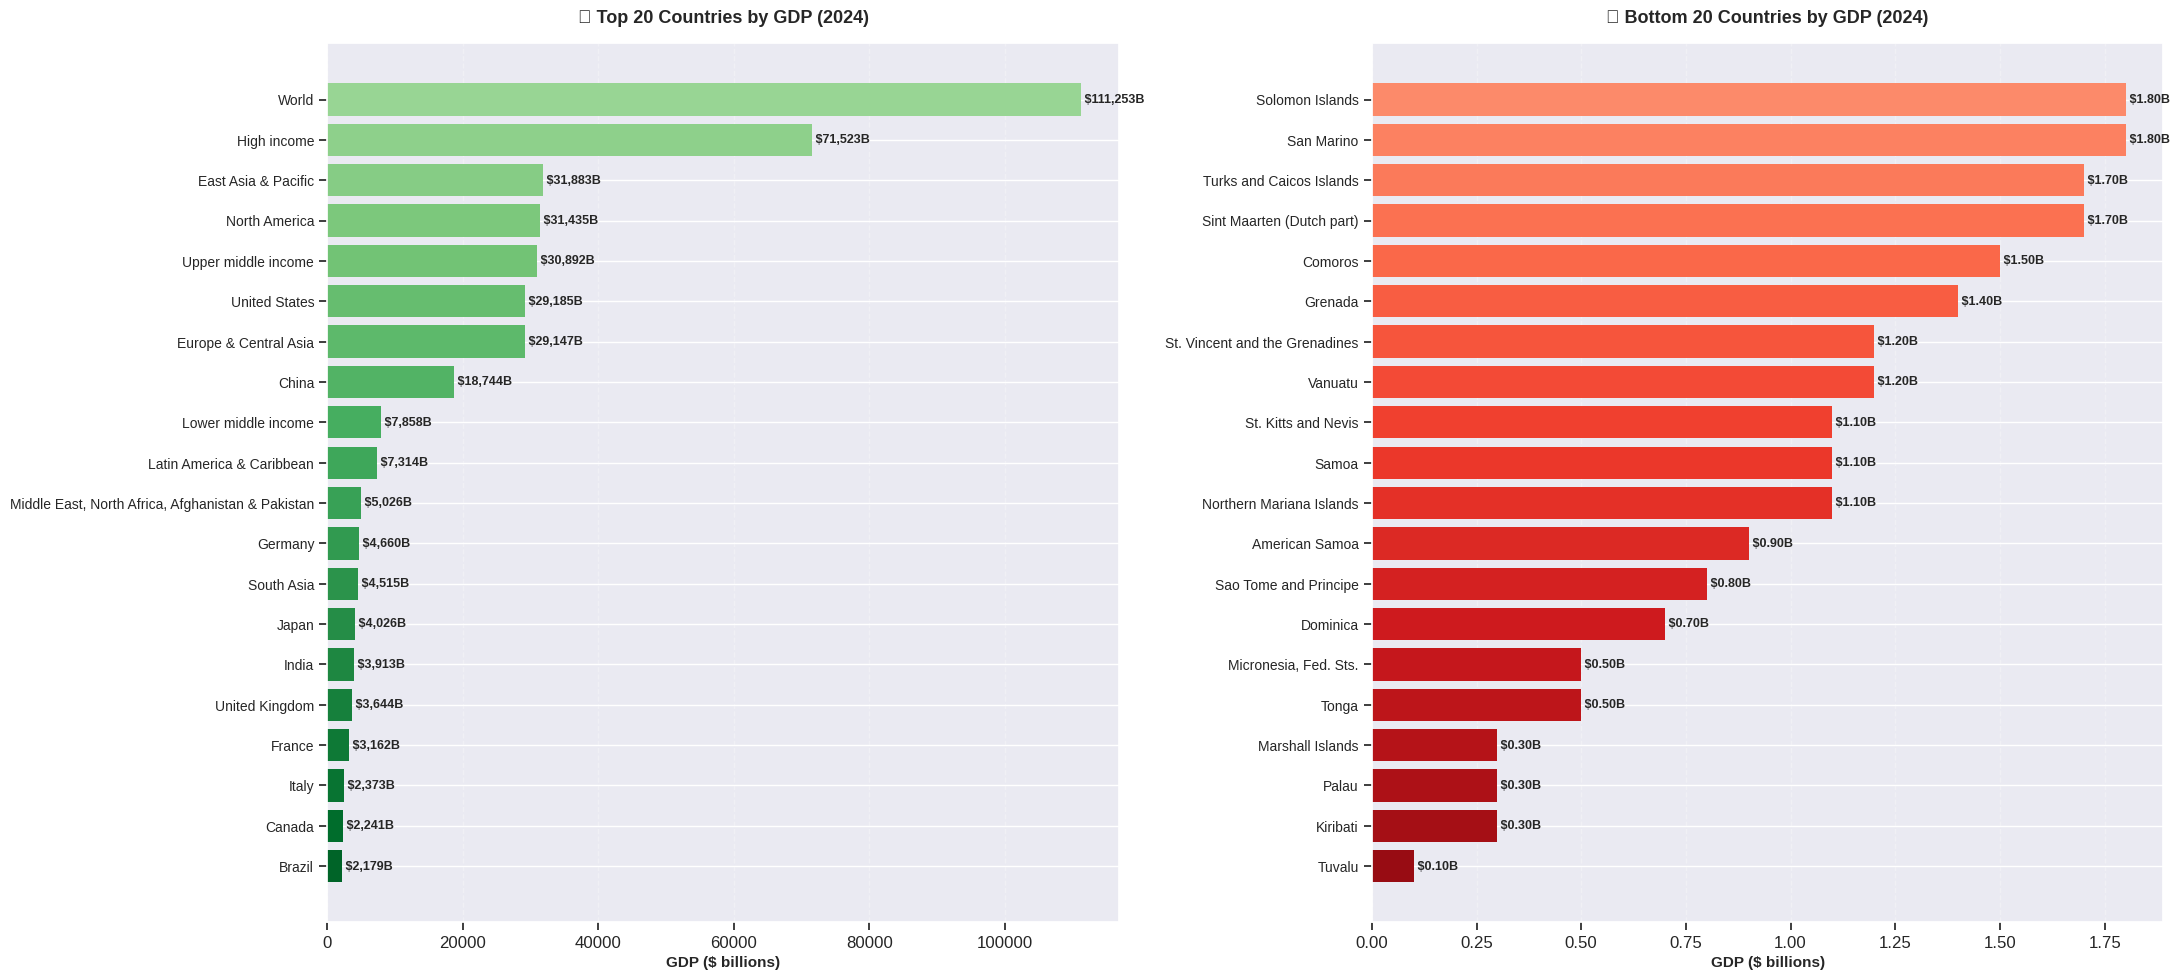


📊 GDP Distribution Summary:
--------------------------------------------------------------------------------
   Highest GDP: World - $111,253.00B
   Lowest GDP: Tuvalu - $0.10B


In [22]:
print("\n" + "="*80)
print("🏆 TOP & BOTTOM COUNTRIES - GDP ANALYSIS")
print("="*80)

# Find GDP 2024 column
gdp_2024_col = [col for col in gdp_cols if '2024' in col and 'billions' in col]

if gdp_2024_col:
    gdp_col = gdp_2024_col[0]
    print(f"\n📊 Analyzing: {gdp_col}")
    
    # Get top 20 and bottom 20 countries
    df_sorted = df[['Country', gdp_col]].dropna().sort_values(gdp_col, ascending=False)
    
    top_20 = df_sorted.head(20)
    bottom_20 = df_sorted.tail(20)
    
    fig, axes = plt.subplots(1, 2, figsize=(22, 10))
    
    # ------------------ TOP 20 ------------------
    ax1 = axes[0]
    bars1 = ax1.barh(
        range(len(top_20)),
        top_20[gdp_col],
        color=plt.cm.Greens(np.linspace(0.4, 0.9, len(top_20)))
    )

    ax1.set_yticks(range(len(top_20)))
    ax1.set_yticklabels(top_20['Country'], fontsize=10)
    ax1.set_xlabel('GDP ($ billions)', fontsize=11, fontweight='bold')
    ax1.set_title('🏆 Top 20 Countries by GDP (2024)', fontsize=13, fontweight='bold', pad=15)
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    ax1.invert_yaxis()
    
    for i, value in enumerate(top_20[gdp_col]):
        ax1.text(value, i, f' ${value:,.0f}B', va='center', fontsize=9, fontweight='bold')
    
    # ------------------ BOTTOM 20 ------------------
    ax2 = axes[1]
    bars2 = ax2.barh(
        range(len(bottom_20)),
        bottom_20[gdp_col],
        color=plt.cm.Reds(np.linspace(0.4, 0.9, len(bottom_20)))
    )

    ax2.set_yticks(range(len(bottom_20)))
    ax2.set_yticklabels(bottom_20['Country'], fontsize=10)
    ax2.set_xlabel('GDP ($ billions)', fontsize=11, fontweight='bold')
    ax2.set_title('📉 Bottom 20 Countries by GDP (2024)', fontsize=13, fontweight='bold', pad=15)
    ax2.grid(axis='x', alpha=0.3, linestyle='--')
    ax2.invert_yaxis()
    
    for i, value in enumerate(bottom_20[gdp_col]):
        ax2.text(value, i, f' ${value:,.2f}B', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/top_bottom_countries_gdp.png', dpi=300, bbox_inches='tight')
    print("   ✅ Saved: top_bottom_countries_gdp.png")
    plt.show()
    
    # ------------------ SUMMARY ------------------
    print("\n📊 GDP Distribution Summary:")
    print("-" * 80)
    print(
        f"   Highest GDP: {top_20.iloc[0]['Country']} "
        f"- ${top_20.iloc[0][gdp_col]:,.2f}B"
    )
    print(
        f"   Lowest GDP: {bottom_20.iloc[-1]['Country']} "
        f"- ${bottom_20.iloc[-1][gdp_col]:,.2f}B"
    )

else:
    print("❌ GDP 2024 column not found.")
